In [4]:
import pandas as pd
import scipy as stats
from scipy.stats import skew,norm
import numpy as np
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('hour.csv')
df_d=pd.read_csv('day.csv')

In [5]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [18]:
df.apply(lambda x:len(x.unique()))
    

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [20]:
df.rename(columns={'yr':'year','cnt':'count','hum':'humidity','hr':'hour'},inplace=True)

In [24]:
cols=['year','hour','weathersit','weekday','holiday','mnth','season']

In [84]:
for i in cols:
    df[i]=df[i].astype('category')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   season      17379 non-null  category
 2   year        17379 non-null  category
 3   mnth        17379 non-null  category
 4   hour        17379 non-null  category
 5   holiday     17379 non-null  category
 6   weekday     17379 non-null  category
 7   workingday  17379 non-null  int64   
 8   weathersit  17379 non-null  category
 9   temp        17379 non-null  float64 
 10  humidity    17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  float64 
dtypes: category(7), float64(3), int64(4)
memory usage: 1.0 MB


<AxesSubplot:>

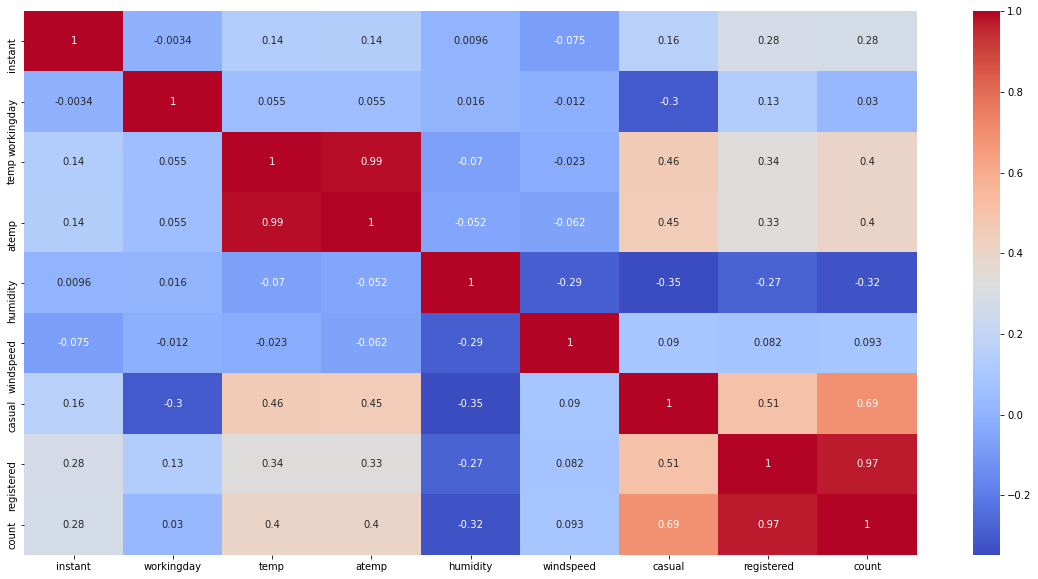

In [42]:
plt.subplots(figsize=(20,10))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')


In [44]:
df.drop(['atemp','windspeed','dteday'],axis=1,inplace=True)

<AxesSubplot:xlabel='hour', ylabel='count'>

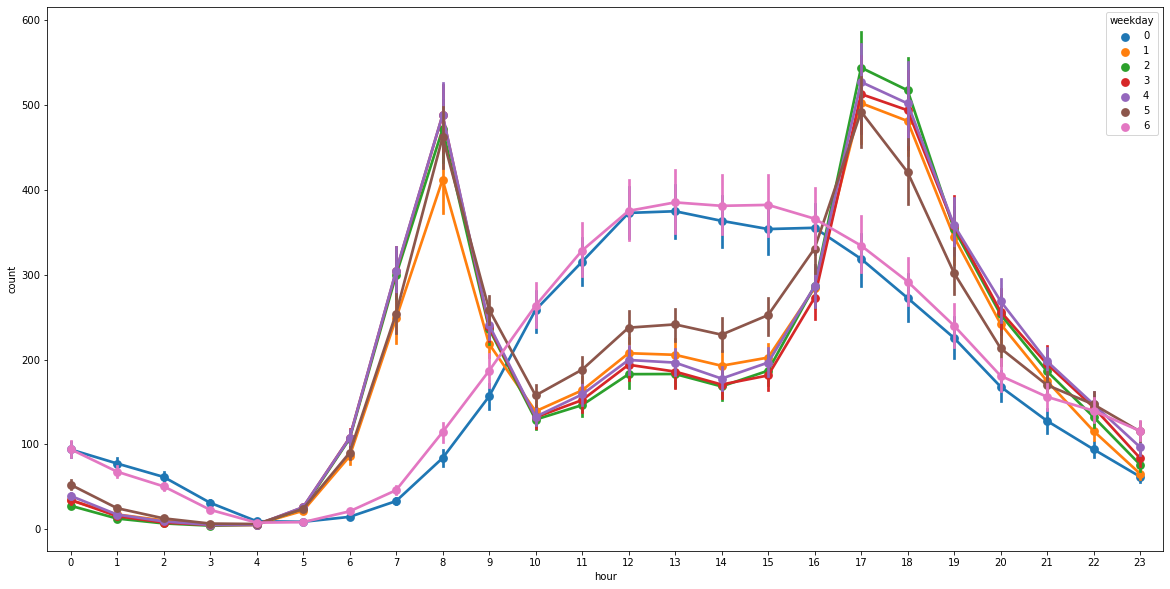

In [46]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df,x='hour',y='count',hue='weekday')

<AxesSubplot:xlabel='hour', ylabel='count'>

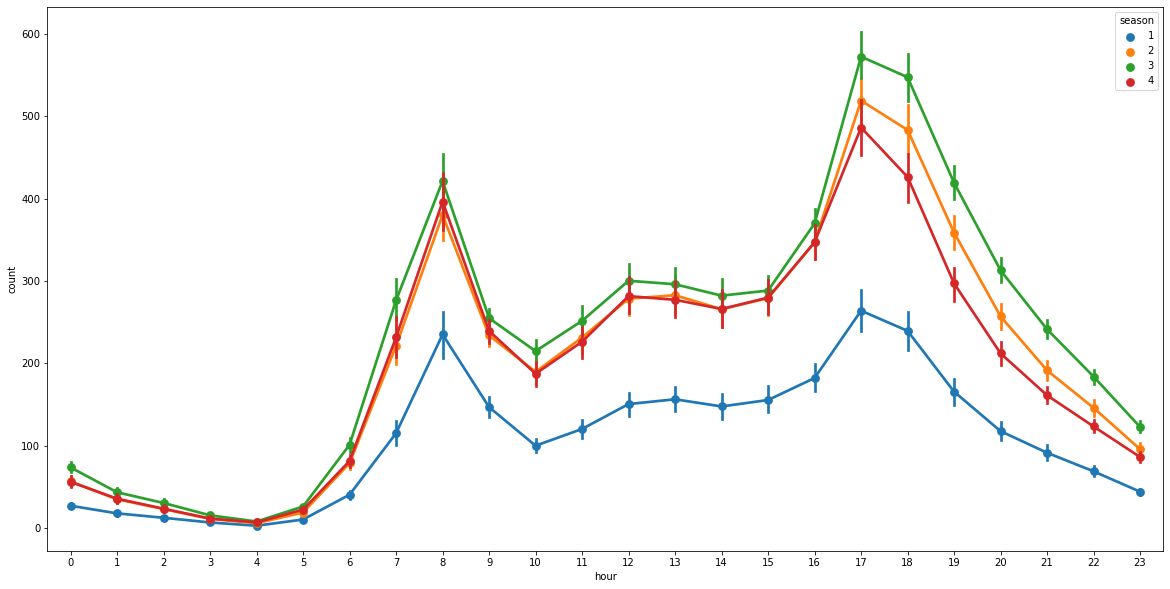

In [48]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df,x='hour',y='count',hue='season')

<AxesSubplot:xlabel='year', ylabel='count'>

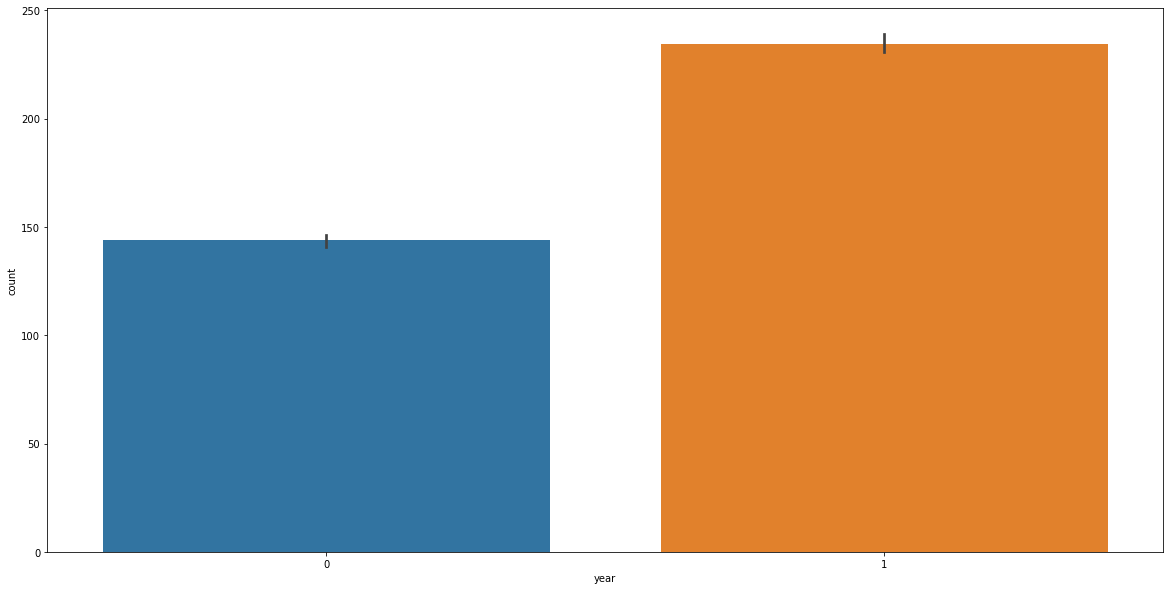

In [52]:
fg,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=df,x='year',y='count')

<AxesSubplot:xlabel='weekday', ylabel='count'>

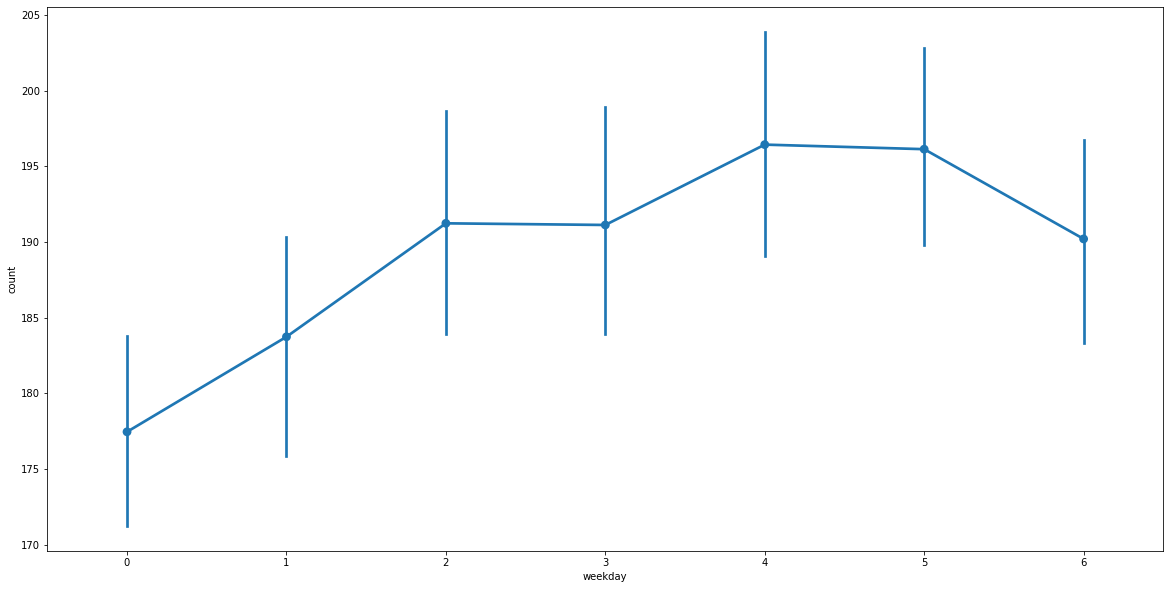

In [56]:
fg,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df,y='count',x='weekday')

<AxesSubplot:xlabel='mnth', ylabel='count'>

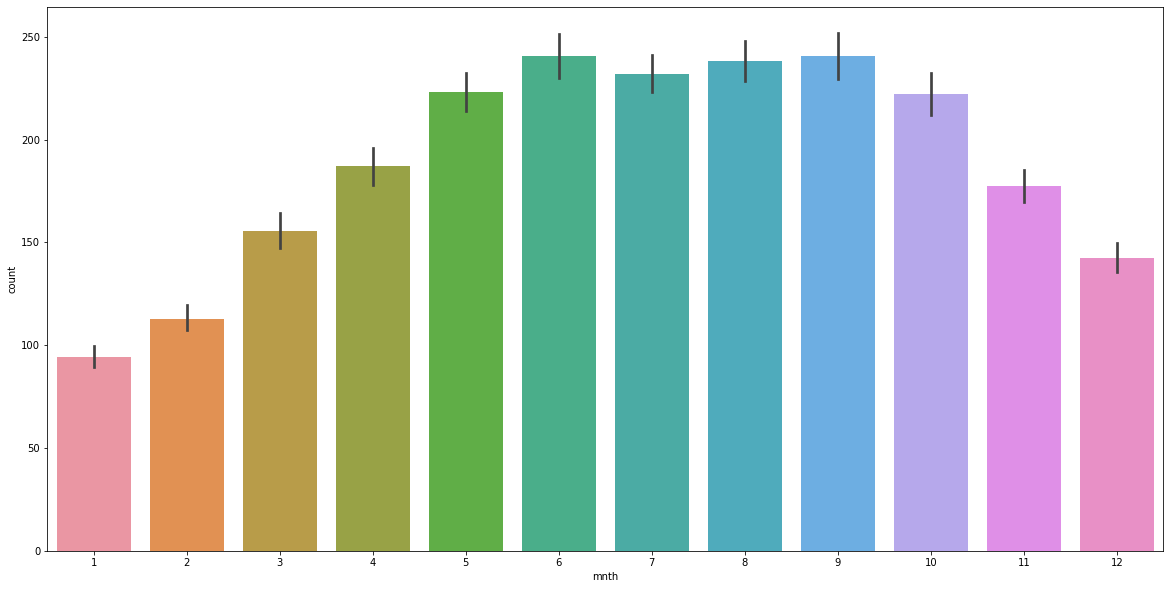

In [59]:
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=df,y='count',x='mnth')

((array([-3.94509974, -3.7271979 , -3.60788822, ...,  3.60788822,
          3.7271979 ,  3.94509974]),
  array([  1,   1,   1, ..., 970, 976, 977], dtype=int64)),
 (169.5620827445581, 189.4630876345015, 0.9346293252087199))

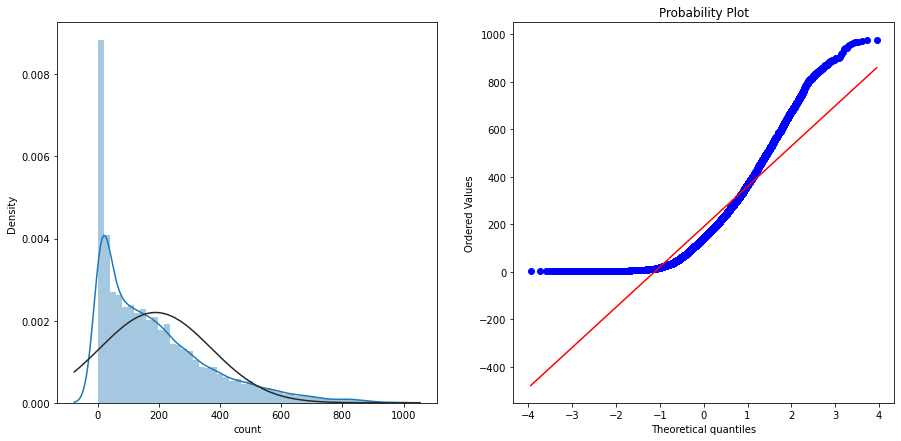

In [71]:
import scipy
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(15,7))
sns.distplot(df['count'],ax=ax1,fit=norm)
scipy.stats.probplot(df['count'],plot=plt)

In [74]:
df['count']=np.log1p(df['count'])

((array([-3.94509974, -3.7271979 , -3.60788822, ...,  3.60788822,
          3.7271979 ,  3.94509974]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.87832647, 6.88448665,
         6.88550967])),
 (1.3661167922512458, 4.574738675088302, 0.963318517188741))

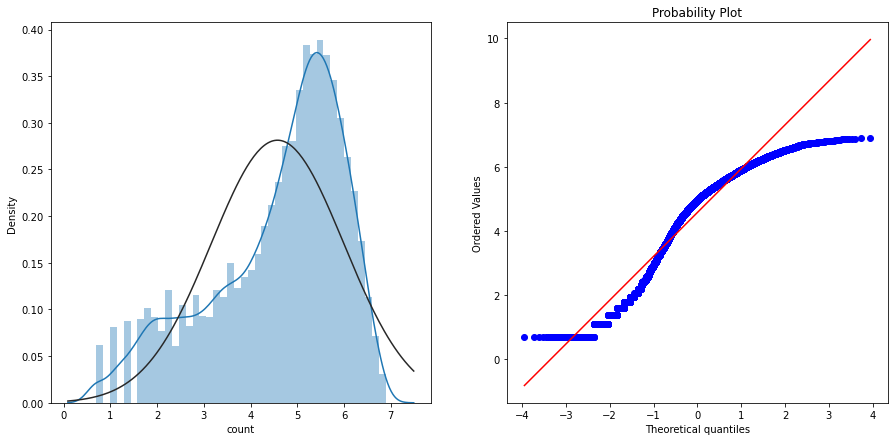

In [81]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(15,7))
sns.distplot(df['count'],fit=norm,ax=ax1)
scipy.stats.probplot(df['count'],plot=plt)

In [93]:
df_oh=df.copy()
def one_hot_encoding(data,column):
    data=pd.concat([data,pd.get_dummies(data[column],prefix=column,drop_first=True)],axis=1)
    data.drop([column],axis=1,inplace=True)
    return data
for col in cols:
    df_oh=one_hot_encoding(df_oh,col)
df_oh.head()

,instant,workingday,temp,humidity,casual,registered,count,year_1,hour_1,hour_2,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,season_2,season_3,season_4
0,1,0,0.24,0.81,3,13,2.833213,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0.22,0.80,8,32,3.713572,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0.22,0.80,5,27,3.496508,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0.24,0.75,3,10,2.639057,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0.24,0.75,0,1,0.693147,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df_oh.drop(['instant'],axis=1,inplace=True)

In [95]:
df_oh.head()

,workingday,temp,humidity,casual,registered,count,year_1,hour_1,hour_2,hour_3,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,season_2,season_3,season_4
0,0,0.24,0.81,3,13,2.833213,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.22,0.80,8,32,3.713572,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.22,0.80,5,27,3.496508,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.24,0.75,3,10,2.639057,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.24,0.75,0,1,0.693147,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
X=df_oh.drop(['count'],axis=1)
y=df_oh['count']

In [107]:
from sklearn.linear_model import LinearRegression,Ridge,HuberRegressor,ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
models=[LinearRegression(),
        Ridge(),
       HuberRegressor(),
       ElasticNetCV(),
       DecisionTreeRegressor(),
       RandomForestRegressor(),
       GradientBoostingRegressor(),
       ExtraTreesRegressor()]

In [120]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5,random_state=42,shuffle=True)
    pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score=pred.mean()
    print("model: ",model)
    print("CV score: ",abs(cv_score))

In [121]:
for l in models:
    train(l)

model:  LinearRegression()
CV score:  0.22194228692538615
model:  Ridge()
CV score:  0.22194780553353904
model:  HuberRegressor()
CV score:  0.2868837643897401
model:  ElasticNetCV()
CV score:  0.6574812432372292
model:  DecisionTreeRegressor()
CV score:  0.000335586672312943
model:  RandomForestRegressor()
CV score:  0.00011601374185250929
model:  GradientBoostingRegressor()
CV score:  0.0008132625225409281
model:  ExtraTreesRegressor()
CV score:  0.0001246758321090553


In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)

In [123]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

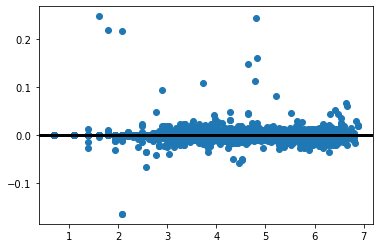

In [124]:
error=y_test-y_pred
fig,ax=plt.subplots()
ax.scatter(y_test,error)
ax.axhline(lw=3,color='black')
plt.show()

In [126]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

0.011411137622929456

In [128]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'